In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score, normalized_mutual_info_score,adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the datasets
dataset1 = pd.read_csv('Dataset1.txt', delimiter="\t")
dataset2 = pd.read_csv('Dataset2.txt', delimiter="\t")

# Display the first few rows of each dataset to get familiar with their structure
dataset1_head = dataset1.head()
dataset2_head = dataset2.head()

In [4]:
dataset1_head

,"x,y,CLASS"
0,"10.5,9,1"
1,"10.56717,9.268445,1"
2,"8.27532,11.38221,1"
3,"8.227458,11.37764,1"
4,"8.179511,11.37211,1"


In [5]:
dataset2_head

,"x,y,CLASS"
0,"2.30561,-9.61493,0"
1,"-0.770364,-7.51462,0"
2,"1.46283,5.79998,0"
3,"0.338422,7.86512,0"
4,"9.10556,-2.8799,0"


## Clean and properly format the datasets

In [6]:
dataset1.columns = dataset1.columns.str.strip()
dataset2.columns = dataset2.columns.str.strip()

dataset1[['x', 'y', 'CLASS']] = dataset1['x,y,CLASS'].str.split(',', expand=True)
dataset2[['x', 'y', 'CLASS']] = dataset2['x,y,CLASS'].str.split(',', expand=True)

dataset1 = dataset1.drop(columns=['x,y,CLASS']).astype(float)
dataset2 = dataset2.drop(columns=['x,y,CLASS']).astype(float)


## Plot the datasets to visualize them

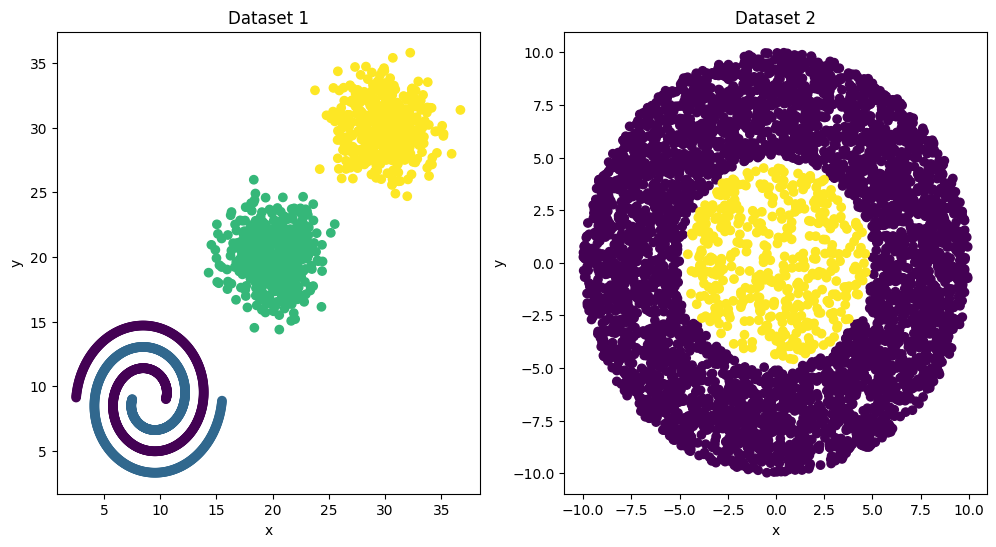

In [7]:

# Plot dataset 1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(dataset1['x'], dataset1['y'], c=dataset1['CLASS'], cmap='viridis')
plt.title('Dataset 1')
plt.xlabel('x')
plt.ylabel('y')

# Plot dataset 2
plt.subplot(1, 2, 2)
plt.scatter(dataset2['x'], dataset2['y'], c=dataset2['CLASS'], cmap='viridis')
plt.title('Dataset 2')
plt.xlabel('x')
plt.ylabel('y')

plt.show()


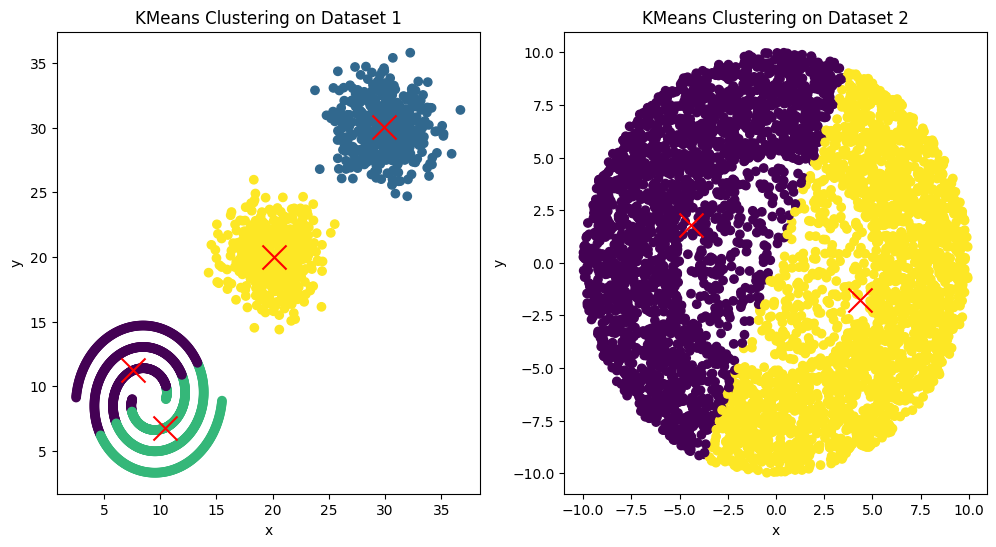

In [10]:
# Set the number of clusters based on the suggestions
n_clusters_dataset1 = 4
n_clusters_dataset2 = 2

# Prepare the data for clustering
X1 = dataset1[['x', 'y']].values
X2 = dataset2[['x', 'y']].values

# Train KMeans on dataset 1
kmeans1 = KMeans(n_clusters=n_clusters_dataset1, random_state=42)
kmeans1.fit(X1)
labels1 = kmeans1.labels_

# Train KMeans on dataset 2
kmeans2 = KMeans(n_clusters=n_clusters_dataset2, random_state=42)
kmeans2.fit(X2)
labels2 = kmeans2.labels_

# Plot the clustered data
plt.figure(figsize=(12, 6))

# Plot clustered dataset 1
plt.subplot(1, 2, 1)
plt.scatter(dataset1['x'], dataset1['y'], c=labels1, cmap='viridis')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('KMeans Clustering on Dataset 1')
plt.xlabel('x')
plt.ylabel('y')

# Plot clustered dataset 2
plt.subplot(1, 2, 2)
plt.scatter(dataset2['x'], dataset2['y'], c=labels2, cmap='viridis')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('KMeans Clustering on Dataset 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


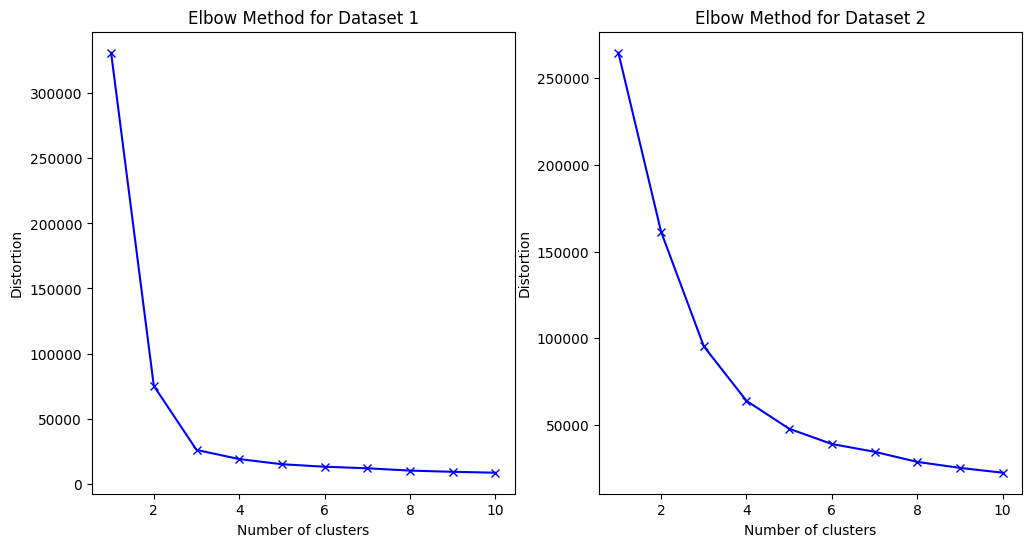

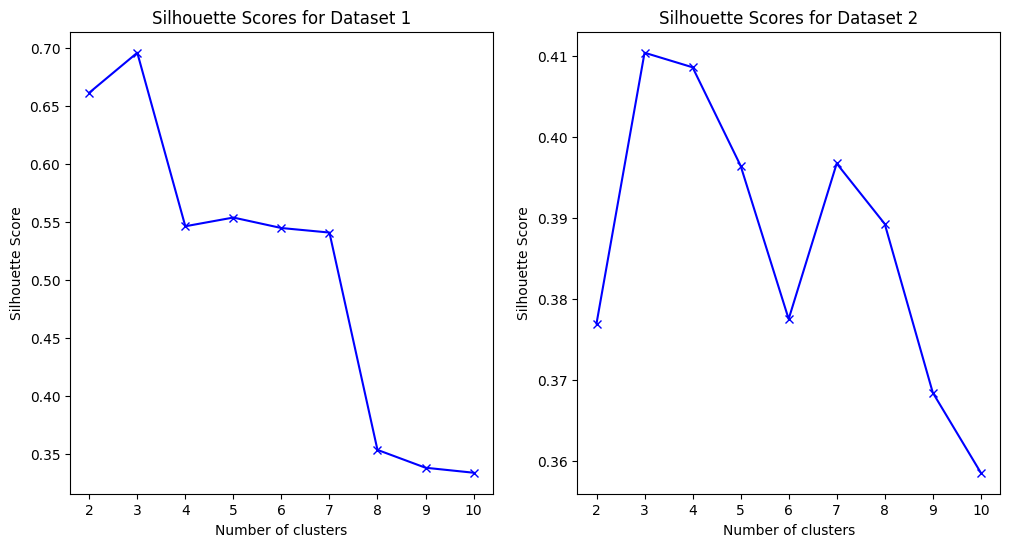

(0.5462398022149616, 0.3769508590260366)

In [13]:
# Calculate silhouette scores for the initial clusters
silhouette_score_1 = silhouette_score(X1, labels1)
silhouette_score_2 = silhouette_score(X2, labels2)

# Determine the optimal number of clusters using the elbow method
def elbow_method(X, max_k):
    distortions = []
    silhouette_scores = []
    K = range(1, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
        if k > 1:
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    return K, distortions, silhouette_scores

K1, distortions1, silhouette_scores1 = elbow_method(X1, 10)
K2, distortions2, silhouette_scores2 = elbow_method(X2, 10)

# Plot the elbow method results for both datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K1, distortions1, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Dataset 1')

plt.subplot(1, 2, 2)
plt.plot(K2, distortions2, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Dataset 2')

plt.show()

# Plot the silhouette scores for both datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K1[1:], silhouette_scores1, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Dataset 1')

plt.subplot(1, 2, 2)
plt.plot(K2[1:], silhouette_scores2, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Dataset 2')

plt.show()



## DBSCAN

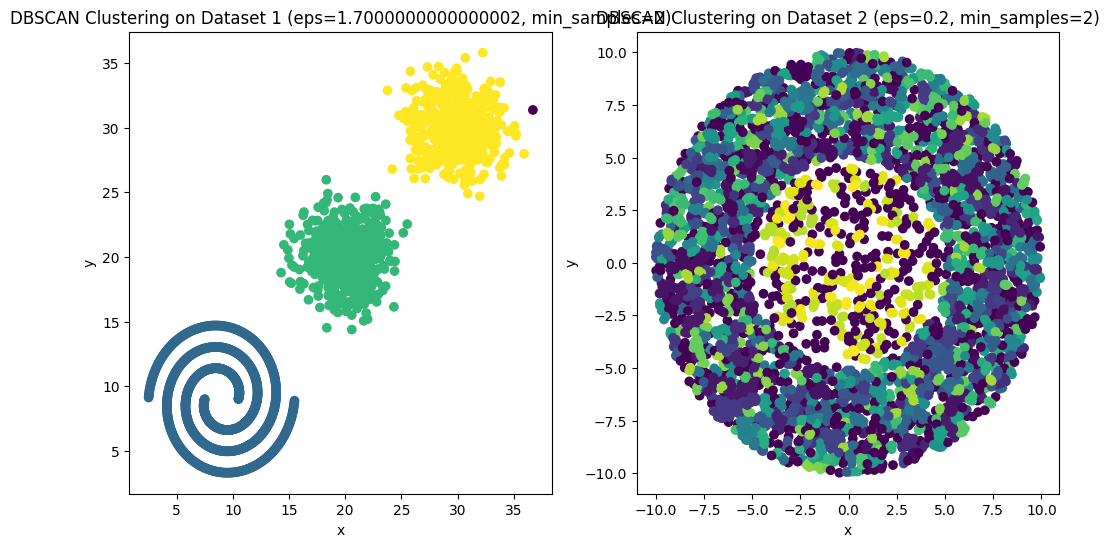

({'eps': 1.7000000000000002, 'min_samples': 2},
 0.6256243766746754,
 {'eps': 0.2, 'min_samples': 2},
 0.1842383015507636)

In [20]:
# Function to find the best DBSCAN parameters
def best_dbscan_params(X, eps_values, min_samples_values):
    best_score = -1
    best_params = {'eps': None, 'min_samples': None}
    best_labels = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            # Silhouette score is only valid if there are more than 1 cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_params['eps'] = eps
                    best_params['min_samples'] = min_samples
                    best_labels = labels
    
    return best_params, best_labels, best_score
eps_values_small = np.arange(0.1, 2.0, 0.1)
min_samples_values_small = range(2, 6)

# Find the best parameters for dataset 1
best_params_1, best_labels_1, best_score_1 = best_dbscan_params(X1, eps_values_small, min_samples_values_small)

# Find the best parameters for dataset 2
best_params_2, best_labels_2, best_score_2 = best_dbscan_params(X2, eps_values_small, min_samples_values_small)

# Plot the DBSCAN clustering results for both datasets
plt.figure(figsize=(12, 6))

# Plot DBSCAN clustered dataset 1
plt.subplot(1, 2, 1)
plt.scatter(dataset1['x'], dataset1['y'], c=best_labels_1, cmap='viridis')
plt.title(f'DBSCAN Clustering on Dataset 1 (eps={best_params_1["eps"]}, min_samples={best_params_1["min_samples"]})')
plt.xlabel('x')
plt.ylabel('y')

# Plot DBSCAN clustered dataset 2
plt.subplot(1, 2, 2)
plt.scatter(dataset2['x'], dataset2['y'], c=best_labels_2, cmap='viridis')
plt.title(f'DBSCAN Clustering on Dataset 2 (eps={best_params_2["eps"]}, min_samples={best_params_2["min_samples"]})')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

best_params_1, best_score_1, best_params_2, best_score_2


## Evaluation

In [22]:
# Correcting the error in the evaluation function to use the correct dataset labels for each dataset
def evaluate_clustering_performance(X, labels, true_labels):
    if len(set(labels)) > 1:  # Ensure there is more than one cluster
        silhouette = silhouette_score(X, labels)
        ari = adjusted_rand_score(true_labels, labels)
        nmi = normalized_mutual_info_score(true_labels, labels)
    else:
        silhouette = -1
        ari = -1
        nmi = -1
    return silhouette, ari, nmi

# Evaluate performance for dataset 1
silhouette_1, ari_1, nmi_1 = evaluate_clustering_performance(X1, best_labels_1, dataset1['CLASS'].astype(int))

# Evaluate performance for dataset 2
silhouette_2, ari_2, nmi_2 = evaluate_clustering_performance(X2, best_labels_2, dataset2['CLASS'].astype(int))

(silhouette_1, ari_1, nmi_1), (silhouette_2, ari_2, nmi_2)


((0.6256243766746754, 0.7133262588370084, 0.8558704180046931),
 (0.1842383015507636, -0.011701920293253404, 0.07642577647581315))

## Outlier detection via K-means

In [27]:
# Load the dataset correctly by specifying the appropriate column separator
dataset3 = pd.read_csv('Dataset3.txt', delimiter=',', skipinitialspace=True)

dataset3.head()

,Unnamed: 0,x,y,CLASS
0,0,15.4640,19.4409,0
1,1,17.7983,14.8367,0
2,2,15.0522,17.2602,0
3,3,15.3265,18.1245,0
4,4,17.7211,15.0053,0


In [28]:
dataset3.drop("Unnamed: 0", axis=1, inplace=True)

## Plot the dataset

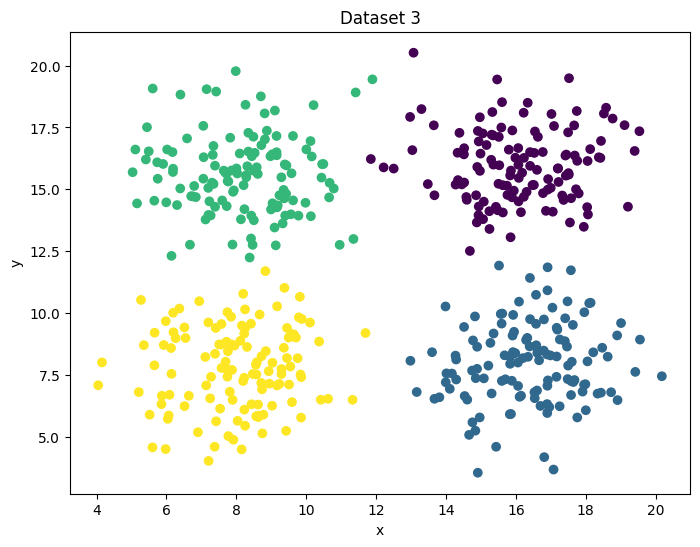

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset3['x'], dataset3['y'], c=dataset3['CLASS'], cmap='viridis')
plt.title('Dataset 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


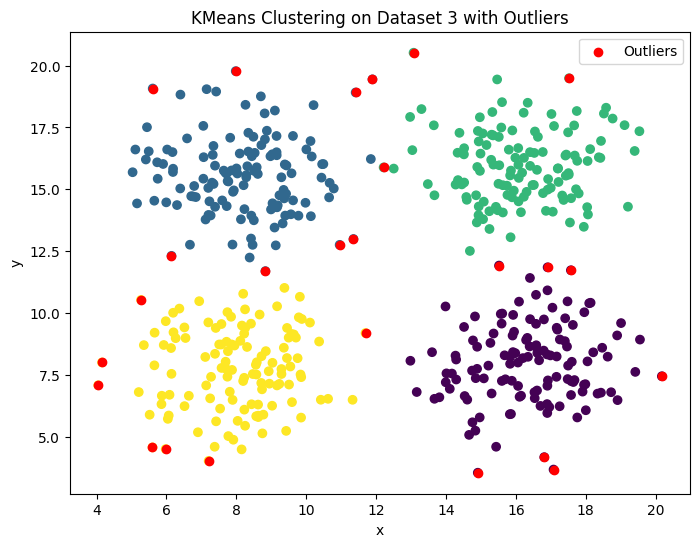

In [33]:
# Standardize the data
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(dataset3[['x', 'y']])

# Fit KMeans with a reasonable number of clusters
n_clusters_3 = 4
kmeans3 = KMeans(n_clusters=n_clusters_3, random_state=42)
kmeans3.fit(X3_scaled)
labels3 = kmeans3.labels_

# Calculate the distance of each point to its closest cluster center
distances = kmeans3.transform(X3_scaled).min(axis=1)

# Define a threshold to identify outliers (e.g., points farther than the 95th percentile distance)
threshold = np.percentile(distances, 95)
outliers = distances > threshold

# Plot the clustered data and highlight the outliers
plt.figure(figsize=(8, 6))
plt.scatter(dataset3['x'], dataset3['y'], c=labels3, cmap='viridis')
plt.scatter(dataset3['x'][outliers], dataset3['y'][outliers], c='red', label='Outliers')
plt.title('KMeans Clustering on Dataset 3 with Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
